# Co-victory team |  Model training Report


---

- Deep learning  algorithms  attempts to learn and process information by creating artificial "neural networks" that can extract complicated concepts and relationships from data. And provide a rapid and interactive responses to resolve issues faster , and to take customers feedback.
<br>
<br>
- Acording to a study publish by [The latence](https://www.thelancet.com/journals/landig/article/PIIS2589-7500(19)30123-2/fulltext#section-7c530872-6235-4433-899c-b3f276970189), deep learning models achieve equivalent levels of diagnostic accuracy compared with health-care professionals. Hierarchical summary ROC curves of  25 studies when averaging across studies, the pooled sensitivity was 88·6% (95% CI 85·7–90·9) for all deep learning algorithms and 79·4% (74·9–83·2) for all health-care professionals. The pooled specificity was 93·9% (92·2–95·3) for deep learning algorithms and 88·1% (82·8–91·9) for health-care professionals.
<br>
<br>
- In our application we used CNN algorithm to identify COVID-19 infection by processing x-ray images
    - CNN=convolutional neural network.


In [36]:
import pandas as pd
import os
# General libraries
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

# Deep learning libraries
#import keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

#Util Component 1: Confusion matrix report/Accuracy measures
from sklearn.metrics import accuracy_score, confusion_matrix

# disabling warnings
import logging
logging.getLogger('tensorflow').disabled = True #warrning lines seen at model architecture creation.

In [37]:
DATASET_DIR = "/Users/sara/Desktop/dataset/"

In [38]:
# Report file distributions
os.listdir(DATASET_DIR)

['.DS_Store', 'normal', 'covid']

# present two samples from the dataset

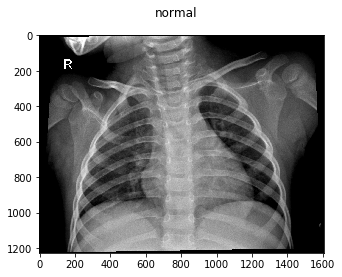

In [39]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + 'normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

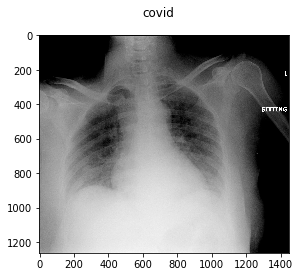

In [40]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + 'covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [41]:
#  Set CNN hyper-parameters
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 15
BATCH_SIZE = 8

In [48]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 59 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - 4s 561ms/step - loss: 1.3174 - accuracy: 0.6275 - val_loss: 0.6130 - val_accuracy: 0.6875
Epoch 2/15
7/7 [==============================] - 4s 592ms/step - loss: 0.6022 - accuracy: 0.6863 - val_loss: 0.6086 - val_accuracy: 0.6875
Epoch 3/15
7/7 [==============================] - 4s 524ms/step - loss: 0.5159 - accuracy: 0.7679 - val_loss: 1.0743 - val_accuracy: 0.6875
Epoch 4/15
7/7 [==============================] - 4s 529ms/step - loss: 0.4486 - accuracy: 0.7826 - val_loss: 0.4275 - val_accuracy: 0.7812
Epoch 5/15
7/7 [==============================] - 4s 544ms/step - loss: 0.4294 - accuracy: 0.8750 - val_loss: 0.5284 - val_accuracy: 0.8125
Epoch 6/15
7/7 [==============================] - 3s 498ms/step - loss: 0.3243 - accuracy: 0.9020 - val_loss: 0.1794 - val_accuracy: 0.9688
Epoch 7/15
7/7 [==============================] - 4s 530ms/step - loss: 0.8086 -

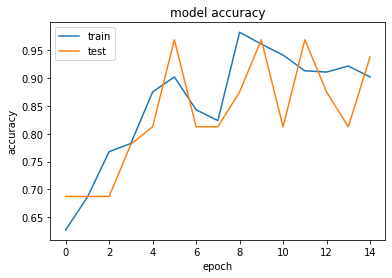

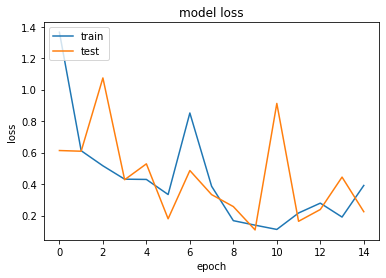

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
print('  Model Accurcy : {}  \n  val_accuracy : {}  \n  Loss : {}  \n  val_loss :{}  \n '.format(history.history['accuracy'][-1],
                                                                                                 history.history['val_accuracy'][-1],
                                                                                                 history.history['loss'][-1],
                                                                                                 history.history['val_loss'][-1]))


  Model Accurcy : 0.9019607901573181  
  val_accuracy : 0.9375  
  Loss : 0.3910600139814265  
  val_loss :0.2243132507428527  
 


In [14]:
model.save('xray_data')

In [15]:
model.save('xray_model.model') 

In [81]:
model.predict_classes(validation_generator[3])


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [72]:
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [9]:
import tensorflow as tf
import cv2
import numpy as np


model_1 = tf.keras.models.load_model('xray_model.h5')

model_1.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('1.jpg')

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

classes = model_1.predict_classes(img.astype(float) / 255.0)
predictions_single = model_1.predict_proba(img.astype(float) / 255.0)
print (classes[0])

[0]


In [63]:
predictions_single = model_1.metrics_names
predictions_single

['loss', 'accuracy']

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [16]:
def prepare(filepath,model):

    img = cv2.imread(filepath)

    img = cv2.resize(img,(150,150))

    img = np.reshape(img,[1,150,150,3])

    classes = model.predict_classes(img.astype(float) / 255.0)

    
    return classes[0][0]

In [19]:

prepare('1.jpg',model_1)

0

In [34]:
CATEGORIES = [ 'covid','normal'] 

In [35]:


print(CATEGORIES[prepare('1.jpg',model_1)])
%time


covid
CPU times: user 27 µs, sys: 6 µs, total: 33 µs
Wall time: 12.2 µs
